In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.google.com/search?q={}'

In [5]:
url.format('machine+learning')

'https://www.google.com/search?q=machine+learning'

In [15]:
h = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}
h

{'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'}

In [16]:
r = requests.get(url.format('python'), headers = h)

In [17]:
r.status_code

200

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>python - Google Search</title><script nonce="ocESHRQJi+MsQ84dLAwuxA==">(function(){\nvar b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'09jCYd_jCLjS1sQPg9698AY\',kEXPI:\'31\',kBL:\'4JUY\'};google.sn=\'web\';google.kHL=\'en-IN\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}func
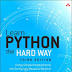
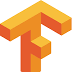
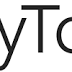
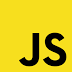
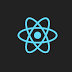
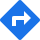
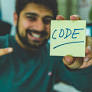
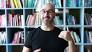
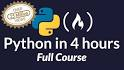
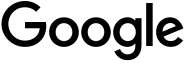

In [18]:
r.text

In [19]:
type(r.text)

str

In [20]:
soup = BeautifulSoup(r.text, 'html.parser')

In [21]:
type(soup)

bs4.BeautifulSoup

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="Anb2GUnhMjfTIX0D2a4a6NPAqPI5GaxxRAiF81XTjHJ2qK4E3Hw3VFM4eaJBgRzz45CNPt624audv+wHOJwfAAEAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjI2MjIwNzk5LCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>python - Google Search</title><script nonce="ocESHRQJi+MsQ84dLAwuxA==">(function(){
var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'09jCYd_jCLjS1sQPg9698AY',kEXPI:'31',kBL:'4JUY'};google.sn='web';google.kHL='en-IN';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a
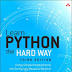
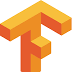
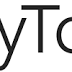
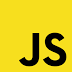
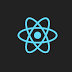
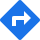
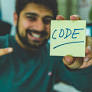
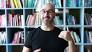
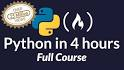
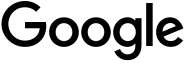

In [22]:
soup

In [23]:
soup.find('h3')

<h3 class="LC20lb MBeuO DKV0Md">Welcome to Python.org</h3>

In [25]:
type(soup.find('h3'))

bs4.element.Tag

In [26]:
soup.find('h3').text

'Welcome to Python.org'

In [27]:
soup.find('h3').attrs['class']

['LC20lb', 'MBeuO', 'DKV0Md']

In [30]:
titles = [i.text for i in soup.find_all('h3',{'class':'LC20lb MBeuO DKV0Md'})]
titles

['Welcome to Python.org',
 'Python (programming language) - Wikipedia',
 'Python Tutorial - W3Schools',
 'Python Tutorial - Tutorialspoint',
 'Online Python Compiler (Interpreter) - Programiz']

In [33]:
links = [i.find('a').attrs['href'] for i in soup.find_all('div',{'class':'yuRUbf'})]
links

['https://www.python.org/',
 'https://en.wikipedia.org/wiki/Python_(programming_language)',
 'https://www.w3schools.com/python/',
 'https://www.tutorialspoint.com/python/index.htm',
 'https://www.programiz.com/python-programming/online-compiler/']

In [35]:
import pandas as pd

In [38]:
titles

['Welcome to Python.org',
 'Python (programming language) - Wikipedia',
 'Python Tutorial - W3Schools',
 'Python Tutorial - Tutorialspoint',
 'Online Python Compiler (Interpreter) - Programiz']

In [39]:
links

['https://www.python.org/',
 'https://en.wikipedia.org/wiki/Python_(programming_language)',
 'https://www.w3schools.com/python/',
 'https://www.tutorialspoint.com/python/index.htm',
 'https://www.programiz.com/python-programming/online-compiler/']

In [46]:
df = pd.DataFrame(zip(['python']*5,titles,links), columns=['Keyword','Title','Link'])
df

,Keyword,Title,Link
0,python,Welcome to Python.org,https://www.python.org/
1,python,Python (programming language) - Wikipedia,https://en.wikipedia.org/wiki/Python_(programm...
2,python,Python Tutorial - W3Schools,https://www.w3schools.com/python/
3,python,Python Tutorial - Tutorialspoint,https://www.tutorialspoint.com/python/index.htm
4,python,Online Python Compiler (Interpreter) - Programiz,https://www.programiz.com/python-programming/o...


In [34]:
keywords = ['python','machine+learning','deep+learning','data+science']

In [50]:
titles = []
links = []
keys = []
for kw in keywords:
    r = requests.get(url.format(kw), headers = h)
    if r.status_code == 200:        
        soup = BeautifulSoup(r.text, 'html.parser')
        titles += [i.text for i in soup.find_all('h3',{'class':'LC20lb MBeuO DKV0Md'})]
        links += [i.find('a').attrs['href'] for i in soup.find_all('div',{'class':'yuRUbf'})]
        keys += [kw]*len(soup.find_all('h3',{'class':'LC20lb MBeuO DKV0Md'}))
df = pd.DataFrame(zip(keys,titles,links), columns=['Keyword','Title','Link'])
df

,Keyword,Title,Link
0,python,Welcome to Python.org,https://www.python.org/
1,python,Python (programming language) - Wikipedia,https://en.wikipedia.org/wiki/Python_(programm...
2,python,Python Tutorial - W3Schools,https://www.w3schools.com/python/
3,python,Python Tutorial - Tutorialspoint,https://www.tutorialspoint.com/python/index.htm
4,python,Online Python Compiler (Interpreter) - Programiz,https://www.programiz.com/python-programming/o...
5,machine+learning,What Is Machine Learning and Why Is It Important?,https://searchenterpriseai.techtarget.com/defi...
6,machine+learning,Machine learning - Wikipedia,https://en.wikipedia.org/wiki/Machine_learning
7,machine+learning,Machine Learning by Stanford University | Cour...,https://www.coursera.org/learn/machine-learning
8,machine+learning,What is Machine Learning? | IBM,https://www.ibm.com/cloud/learn/machine-learning
9,machine+learning,Machine Learning - GeeksforGeeks,https://www.geeksforgeeks.org/machine-learning/


In [51]:
df.to_csv('google_data.csv')

# FLIPKART

In [52]:
url_fk = 'https://www.flipkart.com/search?q={}&page={}'

In [86]:
r = requests.get(url_fk.format('iphone13',1), headers=h)
print(r.status_code)
soup = BeautifulSoup(r.text, 'html.parser')
titles = [i.text for i in soup.find_all('div',{'class':'_4rR01T'})]
prices = [eval(i.text.replace(',','').replace('₹','')) for i in soup.find_all('div',{'class':'_30jeq3 _1_WHN1'})]
c = soup.find('div',{'class':'_1YokD2 _3Mn1Gg'})
avgRates = [eval(i.text) for i in c.find_all('div',{'class':'_3LWZlK'})]
totalRates = [i.find('span').find('span').text for i in c.find_all('span',{'class':'_2_R_DZ'})]
totalRates = list(map(lambda x:''.join(i for i in x if i.isnumeric()), totalRates))
totalReviews = [eval(i.find('span').find_all('span')[2].text.strip('\xa0 ').strip(' Reviews')) for i in c.find_all('span',{'class':'_2_R_DZ'})]
links = [i.attrs['href'] for i in c.find_all('a',{'class':'_1fQZEK'})]

In [100]:
link = links[0]
link

'/apple-iphone-13-midnight-128-gb/p/itmca361aab1c5b0?pid=MOBG6VF5Q82T3XRS&lid=LSTMOBG6VF5Q82T3XRSZ5F6JB&marketplace=FLIPKART&q=iphone13&store=tyy%2F4io&srno=s_1_1&otracker=search&fm=organic&iid=1e9cd8f1-9a7f-440d-869c-bc1b8ea2a3ce.MOBG6VF5Q82T3XRS.SEARCH&ppt=None&ppn=None&ssid=vicwbt25hs0000001640164066316&qH=7d4afaedfc628b80'

In [101]:
link1 = link.split('/')
link1

['',
 'apple-iphone-13-midnight-128-gb',
 'p',
 'itmca361aab1c5b0?pid=MOBG6VF5Q82T3XRS&lid=LSTMOBG6VF5Q82T3XRSZ5F6JB&marketplace=FLIPKART&q=iphone13&store=tyy%2F4io&srno=s_1_1&otracker=search&fm=organic&iid=1e9cd8f1-9a7f-440d-869c-bc1b8ea2a3ce.MOBG6VF5Q82T3XRS.SEARCH&ppt=None&ppn=None&ssid=vicwbt25hs0000001640164066316&qH=7d4afaedfc628b80']

In [102]:
link1[1]

'apple-iphone-13-midnight-128-gb'

In [106]:
'&'.join(link1[-1].split('&')[:3])

'itmca361aab1c5b0?pid=MOBG6VF5Q82T3XRS&lid=LSTMOBG6VF5Q82T3XRSZ5F6JB&marketplace=FLIPKART'

In [87]:
totalRates

['1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '1417',
 '346',
 '346',
 '346',
 '481',
 '346',
 '346',
 '346',
 '170',
 '481']